In [6]:
pip install pandas --quiet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\HIMANGSHUB\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [7]:
import pandas as pd
import numpy as np

Reading the DataSet 

In [8]:
data_df = pd.read_csv('ASIANPAINT.csv')
data_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-02,989.450012,995.000000,981.950012,989.000000,958.942017,1365514
1,2017-02-03,990.000000,993.900024,981.049988,985.900024,955.936096,465754
2,2017-02-06,990.099976,1004.950012,985.500000,992.500000,962.335571,744278
3,2017-02-07,992.000000,1003.950012,990.200012,999.299988,968.928833,577723
4,2017-02-08,999.299988,1009.900024,981.000000,997.700012,967.377563,1192386
...,...,...,...,...,...,...,...
1230,2022-01-25,3100.000000,3156.949951,3010.750000,3147.100098,3147.100098,2699779
1231,2022-01-27,3140.100098,3143.000000,3071.250000,3116.949951,3116.949951,1834684
1232,2022-01-28,3130.000000,3170.000000,3103.000000,3110.850098,3110.850098,892060
1233,2022-01-31,3140.000000,3193.449951,3136.399902,3152.250000,3152.250000,944530


In [9]:
data_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-02-02,989.450012,995.000000,981.950012,989.000000,958.942017,1365514
1,2017-02-03,990.000000,993.900024,981.049988,985.900024,955.936096,465754
2,2017-02-06,990.099976,1004.950012,985.500000,992.500000,962.335571,744278
3,2017-02-07,992.000000,1003.950012,990.200012,999.299988,968.928833,577723
4,2017-02-08,999.299988,1009.900024,981.000000,997.700012,967.377563,1192386


In [10]:
data_df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03
mean,1784.580607,1804.636760,1763.160690,1783.614210,1762.049029,1.448089e+06
std,699.204529,706.664895,690.499606,698.234663,707.391939,1.112168e+06
min,961.000000,973.400024,953.849976,960.799988,931.598938,7.026400e+04
25%,1213.950012,1231.325012,1196.200012,1215.575012,1183.003357,7.508415e+05
50%,1514.000000,1531.449951,1495.150024,1519.300049,1491.635620,1.137313e+06
75%,2166.675049,2199.349976,2153.074951,2168.000000,2154.776001,1.766695e+06
max,3580.000000,3590.000000,3534.000000,3576.300049,3576.300049,1.154592e+07


In [11]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1235 non-null   object 
 1   Open       1235 non-null   float64
 2   High       1235 non-null   float64
 3   Low        1235 non-null   float64
 4   Close      1235 non-null   float64
 5   Adj Close  1235 non-null   float64
 6   Volume     1235 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.7+ KB


In [12]:
data_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
data_df.count()

Date         1235
Open         1235
High         1235
Low          1235
Close        1235
Adj Close    1235
Volume       1235
dtype: int64

In [14]:
data_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [16]:
data_open = data_df['Open']
data_open

0        989.450012
1        990.000000
2        990.099976
3        992.000000
4        999.299988
           ...     
1230    3100.000000
1231    3140.100098
1232    3130.000000
1233    3140.000000
1234    3194.000000
Name: Open, Length: 1235, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler();
data_input = scaler.fit_transform(np.array(data_open).reshape(-1,1))
data_input.shape

(1235, 1)

In [38]:
# splitting dataset 

training_size = int(len(data_input)*0.65) # no. of instance of training set
test_size = len(data_input) - training_size # no. of instances of test set
print(test_size)
train_data , test_data = data_input[0:training_size ,:] , data_input[training_size:len(data_input),:]


433


In [36]:
train_data.shape , test_data.shape

((802, 1), (433, 1))

In [39]:
def create_dataset(dataset , time_step=1):
    dataX , dataY = [] ,[]
    for i in range (len(dataset)-time_step -1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [40]:
time_step = 60
X_train , y_train = create_dataset(train_data,time_step)
X_test,y_test = create_dataset(test_data,time_step)

In [42]:
X_train.shape

(741, 60)

In [55]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [56]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model = Sequential();
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error" , optimizer='adam')

In [63]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train , y_train , validation_data=(X_test,y_test) , epochs=100 ,  batch_size=32 , verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 135ms/step - loss: 0.0049 - val_loss: 0.0104
Epoch 2/100
24/24 [==============================] - 2s 80ms/step - loss: 7.6609e-04 - val_loss: 0.0022
Epoch 3/100
24/24 [==============================] - 2s 76ms/step - loss: 5.6134e-04 - val_loss: 0.0041
Epoch 4/100
24/24 [==============================] - 2s 77ms/step - loss: 5.9389e-04 - val_loss: 0.0039
Epoch 5/100
24/24 [==============================] - 2s 76ms/step - loss: 5.2759e-04 - val_loss: 0.0037
Epoch 6/100
24/24 [==============================] - 2s 76ms/step - loss: 4.9100e-04 - val_loss: 0.0029
Epoch 7/100
24/24 [==============================] - 2s 77ms/step - loss: 4.9006e-04 - val_loss: 0.0033
Epoch 8/100
24/24 [==============================] - 2s 78ms/step - loss: 4.5927e-04 - val_loss: 0.0056
Epoch 9/100
24/24 [==============================] - 2s 77ms/step - loss: 4.3892e-04 - val_loss: 0.0040
Epoch 10/100
24/24 [==============================] - 2s 77ms/step

In [65]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [67]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

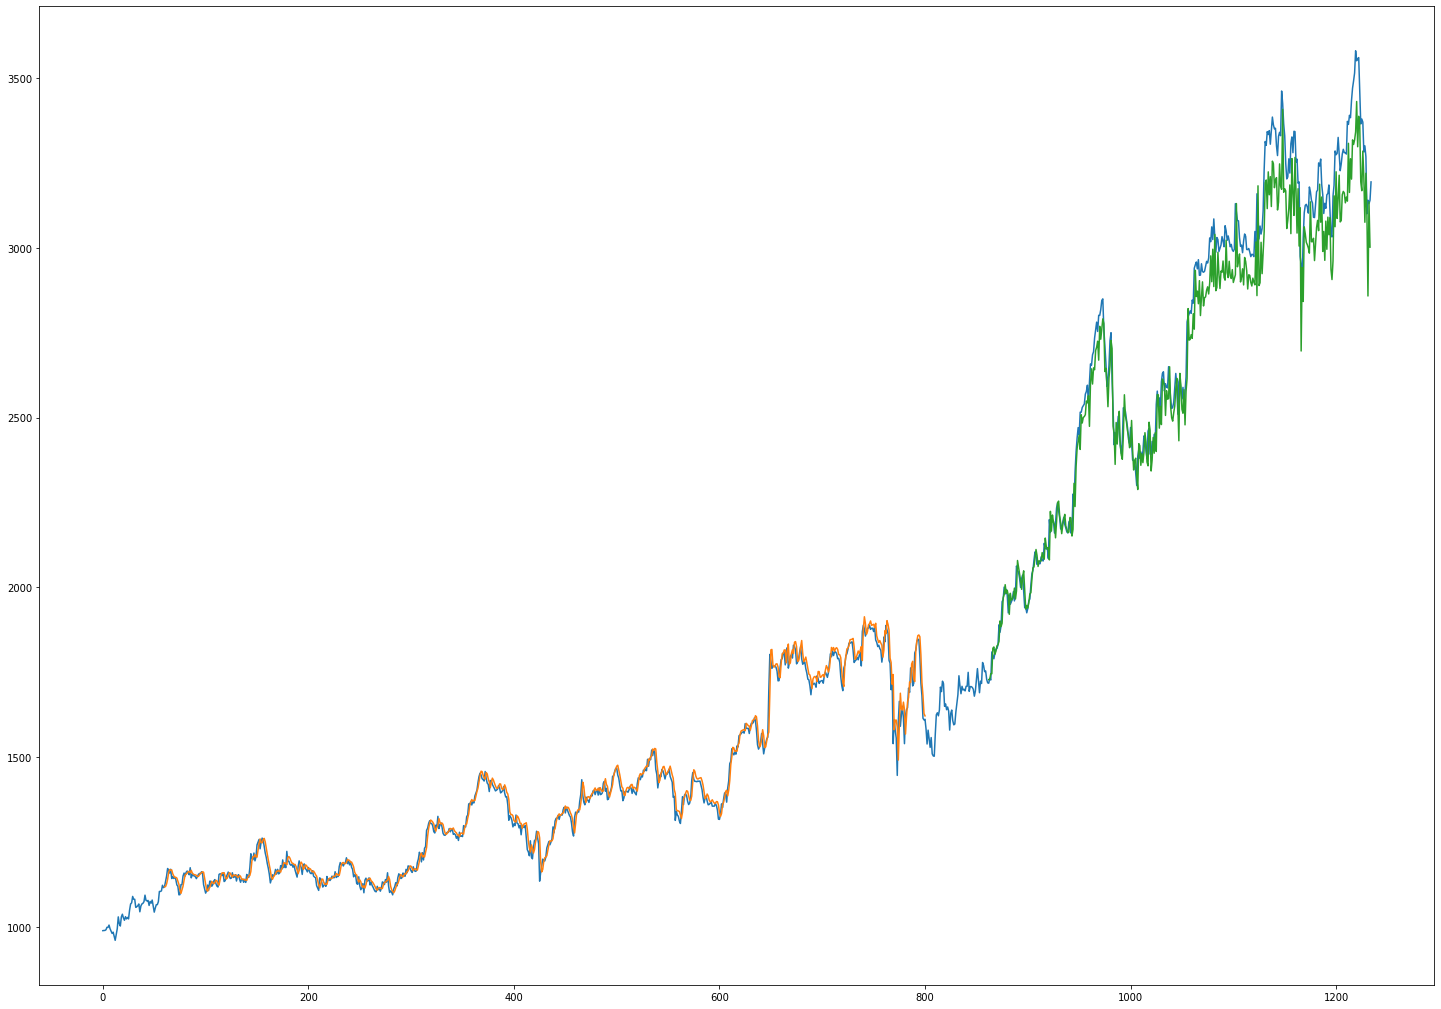

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(25,18)) 
look_back = 60
trainPredictPlot = np.empty_like(data_input)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data_input)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+look_back*2 + 1 : len(data_input)-1,:] = test_predict

plt.plot(scaler.inverse_transform(data_input))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


